<a href="https://colab.research.google.com/github/rohank91/Football-Anaytics-with-Python/blob/main/Analytical_Comparison_of_two_players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Messi vs Ronaldo - An Analytical Debate

## Flow of the Notebook:
1. Get data from [Understat](https://understat.com/) for Messi and Ronaldo
2. Data Cleaning and Exploration of the data for Messi and Ronaldo on different aspects
3. Comparative Analysis
4. Shot Analysis
5. The Final comparison

In [ ]:
import json
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.patches import Arc
from plotly.subplots import make_subplots

# Scrape the Data

## Cristiano Ronaldo

### Season-wise data

In [ ]:
# Scrape Cristiano player stats:
cris_scrape_url = "https://understat.com/player/2371"
page_connect = urlopen(cris_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

cris_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
cris_season_wise_meta_df.insert(0, "Player", "Cristiano")

In [ ]:
cris_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,Sub,1,0,1,28,0.20496894419193268,0,0.03537696972489357,1,2021,Juventus,1,0,0,0.20496894419193268,0.051310088485479355,0.015933118760585785
1,Cristiano,FW,33,29,167,2807,29.83808070421219,3,3.8546393513679504,36,2020,Juventus,3,0,23,23.74781009554863,28.635406404733658,8.915717896074057
2,Cristiano,FWL,33,31,208,2920,29.431679474189878,5,6.067225832492113,51,2019,Juventus,3,0,19,19.53495633788407,26.5536093339324,7.224641568958759
3,Cristiano,FW,31,21,175,2692,23.32403990253806,8,5.193873833864927,48,2018,Juventus,3,0,16,18.75628685578704,21.854169853031635,7.177339139394462
4,Cristiano,FW,27,26,178,2304,26.999303579330444,5,5.524841643869877,40,2017,Real Madrid,1,0,23,24.02619305253029,31.62383733689785,9.47185287065804
5,Cristiano,FWL,29,25,162,2546,25.413737758994102,6,4.591035931371152,31,2016,Real Madrid,4,0,19,19.467644795775414,29.57457834482193,8.661094894632697
6,Cristiano,AML,36,35,227,3186,35.58900645375252,11,8.606404347345233,51,2015,Real Madrid,3,0,29,28.899507626891136,40.81802845001221,9.863004602491856
7,Cristiano,FWL,35,48,225,3103,39.30876067932695,16,13.600642347708344,76,2014,Real Madrid,5,1,38,30.389685845933855,43.60801999177784,7.5202372539788485


### Shots Data

In [ ]:
# Scrape Cristiano shot data
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

cris_shots_df = pd.json_normalize(json.loads(json_data))
cris_shots_df.insert(0, "Player", "Cristiano")

In [ ]:
cris_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.845,0.49900001525878906,0.06659495085477829,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.7680000305175781,0.625,0.03090905211865902,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.7080000305175781,0.6719999694824219,0.022334257140755653,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.8159999847412109,0.245,0.02082291804254055,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.885,0.5,0.7432776093482971,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338,Cristiano,421363,44,Goal,0.8719999694824219,0.4370000076293945,0.36698365211486816,Cristiano Ronaldo,a,2371,OpenPlay,2020,LeftFoot,15779,Sassuolo,Juventus,1,3,2021-05-12 18:45:00,Adrien Rabiot,TakeOn
1339,Cristiano,421374,77,ShotOnPost,0.86,0.715,0.05728159844875336,Cristiano Ronaldo,a,2371,OpenPlay,2020,RightFoot,15779,Sassuolo,Juventus,1,3,2021-05-12 18:45:00,Dejan Kulusevski,Pass
1340,Cristiano,422004,23,SavedShot,0.885,0.5,0.7612988352775574,Cristiano Ronaldo,h,2371,Penalty,2020,RightFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,None,Standard
1341,Cristiano,422005,23,Goal,0.9390000152587891,0.5279999923706055,0.6015962958335876,Cristiano Ronaldo,h,2371,SetPiece,2020,RightFoot,15790,Juventus,Inter,3,2,2021-05-15 16:00:00,None,Rebound


## Messi

### Season-wise data

In [ ]:
# Scrape Messi player stats:
messi_scrape_url = "https://understat.com/player/2097"
page_connect = urlopen(messi_scrape_url)
page_html = BeautifulSoup(page_connect, "html.parser")

json_raw_string = page_html.findAll(name="script")[1].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_season_wise_meta_df = pd.json_normalize(json.loads(json_data)["season"])
messi_season_wise_meta_df.insert(0, "Player", "Messi")

In [ ]:
messi_season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Messi,Sub,1,0,0,23,0,0,0,0,2021,Paris Saint Germain,0,0,0,0,0,0
1,Messi,FW,35,30,195,3017,26.676843278110027,9,11.422847747802734,77,2020,Barcelona,4,0,27,22.96045546978712,37.906863175332546,20.33736250922084
2,Messi,Sub,33,25,159,2876,20.84966728463769,20,16.593363385647535,88,2019,Barcelona,4,0,20,17.133279267698526,34.92346678301692,13.53765751607716
3,Messi,FW,34,36,170,2704,25.997169069945812,13,15.33516551926732,93,2018,Barcelona,3,0,32,22.28090887516737,38.45987746119499,10.69879900291562
4,Messi,FW,36,34,196,2995,28.946280613541603,12,15.100405622273684,87,2017,Barcelona,3,0,32,25.973170146346092,48.18063422292471,21.634404016658664
5,Messi,FWR,34,37,179,2832,26.885174363851547,9,13.955131396651268,79,2016,Barcelona,6,0,31,21.682230830192566,42.52504535019398,18.13351222872734
6,Messi,FWR,33,26,158,2726,27.101910315454006,16,15.871278138831258,77,2015,Barcelona,3,0,23,21.899351350963116,41.99686624109745,15.196364373899996
7,Messi,FW,38,43,187,3374,35.89176357910037,18,17.61195552162826,95,2014,Barcelona,4,0,38,31.432097773998976,54.75360991060734,19.75672373920679


### Shots Data

In [ ]:
# Scrape Messi shot data:
json_raw_string = page_html.findAll(name="script")[3].text
start_ind = json_raw_string.index("\\")
stop_ind = json_raw_string.index("')")

json_data = json_raw_string[start_ind:stop_ind]
json_data = json_data.encode("utf8").decode("unicode_escape")

messi_shots_df = pd.json_normalize(json.loads(json_data))
messi_shots_df.insert(0, "Player", "Messi")

In [ ]:
messi_shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Messi,32522,22,MissedShots,0.7859999847412109,0.52,0.03867039829492569,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Rafinha,Pass
1,Messi,32525,41,Goal,0.8619999694824219,0.615,0.06870150566101074,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,Sergio Busquets,BallRecovery
2,Messi,32529,62,Goal,0.86,0.435,0.15034306049346924,Lionel Messi,h,2097,OpenPlay,2014,LeftFoot,5831,Barcelona,Elche,3,0,2014-08-24 20:00:00,None,TakeOn
3,Messi,32769,3,SavedShot,0.8180000305175781,0.38,0.045503295958042145,Lionel Messi,a,2097,OpenPlay,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,Pedro,Pass
4,Messi,32773,27,SavedShot,0.8690000152587891,0.19200000762939454,0.06531666964292526,Lionel Messi,a,2097,DirectFreekick,2014,LeftFoot,5842,Villarreal,Barcelona,0,1,2014-08-31 18:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,Messi,422600,18,MissedShots,0.9519999694824218,0.6659999847412109,0.06496187299489975,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,Chipped
1240,Messi,422601,27,Goal,0.925,0.4370000076293945,0.3019910752773285,Lionel Messi,h,2097,OpenPlay,2020,Head,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped
1241,Messi,422604,41,BlockedShot,0.7659999847412109,0.42400001525878905,0.032836854457855225,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,TakeOn
1242,Messi,422612,84,SavedShot,0.8269999694824218,0.3970000076293945,0.05391271412372589,Lionel Messi,h,2097,SetPiece,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped


## Build Final Season-level and shots data

### Joint Season-wise Data

In [ ]:
season_wise_meta_df = cris_season_wise_meta_df.append(messi_season_wise_meta_df)
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,Sub,1,0,1,28,0.20496894419193268,0,0.03537696972489357,1,2021,Juventus,1,0,0,0.20496894419193268,0.051310088485479355,0.015933118760585785
1,Cristiano,FW,33,29,167,2807,29.83808070421219,3,3.8546393513679504,36,2020,Juventus,3,0,23,23.74781009554863,28.635406404733658,8.915717896074057
2,Cristiano,FWL,33,31,208,2920,29.431679474189878,5,6.067225832492113,51,2019,Juventus,3,0,19,19.53495633788407,26.5536093339324,7.224641568958759
3,Cristiano,FW,31,21,175,2692,23.32403990253806,8,5.193873833864927,48,2018,Juventus,3,0,16,18.75628685578704,21.854169853031635,7.177339139394462
4,Cristiano,FW,27,26,178,2304,26.999303579330444,5,5.524841643869877,40,2017,Real Madrid,1,0,23,24.02619305253029,31.62383733689785,9.47185287065804
5,Cristiano,FWL,29,25,162,2546,25.413737758994102,6,4.591035931371152,31,2016,Real Madrid,4,0,19,19.467644795775414,29.57457834482193,8.661094894632697
6,Cristiano,AML,36,35,227,3186,35.58900645375252,11,8.606404347345233,51,2015,Real Madrid,3,0,29,28.899507626891136,40.81802845001221,9.863004602491856
7,Cristiano,FWL,35,48,225,3103,39.30876067932695,16,13.600642347708344,76,2014,Real Madrid,5,1,38,30.389685845933855,43.60801999177784,7.5202372539788485
0,Messi,Sub,1,0,0,23,0,0,0,0,2021,Paris Saint Germain,0,0,0,0,0,0
1,Messi,FW,35,30,195,3017,26.676843278110027,9,11.422847747802734,77,2020,Barcelona,4,0,27,22.96045546978712,37.906863175332546,20.33736250922084


### Joint Shots Data

In [ ]:
shots_df = cris_shots_df.append(messi_shots_df)
shots_df

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.845,0.49900001525878906,0.06659495085477829,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.7680000305175781,0.625,0.03090905211865902,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.7080000305175781,0.6719999694824219,0.022334257140755653,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.8159999847412109,0.245,0.02082291804254055,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.885,0.5,0.7432776093482971,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,Messi,422600,18,MissedShots,0.9519999694824218,0.6659999847412109,0.06496187299489975,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,Chipped
1240,Messi,422601,27,Goal,0.925,0.4370000076293945,0.3019910752773285,Lionel Messi,h,2097,OpenPlay,2020,Head,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped
1241,Messi,422604,41,BlockedShot,0.7659999847412109,0.42400001525878905,0.032836854457855225,Lionel Messi,h,2097,OpenPlay,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Antoine Griezmann,TakeOn
1242,Messi,422612,84,SavedShot,0.8269999694824218,0.3970000076293945,0.05391271412372589,Lionel Messi,h,2097,SetPiece,2020,LeftFoot,15141,Barcelona,Celta Vigo,1,2,2021-05-16 16:30:00,Sergio Busquets,Chipped


In [ ]:
shots_df.describe()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
count,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,2587,1803,2587
unique,2,2587,97,5,309,509,2491,2,2,2,5,8,4,458,53,55,11,8,453,100,22
top,Cristiano,34428,50,MissedShots,0.885,0.5,0.7432776093482971,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,4047,Barcelona,Barcelona,2,1,2015-05-17 18:00:00,Luis Suárez,Pass
freq,1343,1,41,752,114,106,67,1343,1459,1343,1848,412,1377,14,720,566,660,803,16,126,1033


# Data Cleaning and EDA

## On Season-wise data

### Numerical EDA

In [ ]:
season_wise_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 7
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Player      16 non-null     object
 1   position    16 non-null     object
 2   games       16 non-null     object
 3   goals       16 non-null     object
 4   shots       16 non-null     object
 5   time        16 non-null     object
 6   xG          16 non-null     object
 7   assists     16 non-null     object
 8   xA          16 non-null     object
 9   key_passes  16 non-null     object
 10  season      16 non-null     object
 11  team        16 non-null     object
 12  yellow      16 non-null     object
 13  red         16 non-null     object
 14  npg         16 non-null     object
 15  npxG        16 non-null     object
 16  xGChain     16 non-null     object
 17  xGBuildup   16 non-null     object
dtypes: object(18)
memory usage: 2.4+ KB


In [ ]:
season_wise_meta_df = season_wise_meta_df.apply(pd.to_numeric, errors="ignore")

In [ ]:
season_wise_meta_df = season_wise_meta_df.round(2)

In [ ]:
season_wise_meta_df.describe().round(1)

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
count,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0
mean,29.3,27.9,161.7,2508.3,25.2,9.4,9.6,58.1,2017.5,3.1,0.1,23.1,20.5,32.6,11.1
std,11.4,12.9,66.4,1001.6,10.9,6.1,6.0,30.7,2.4,1.5,0.2,11.2,9.0,15.2,6.6
min,1.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,2014.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,30.5,25.0,161.2,2655.5,24.9,5.0,5.0,39.0,2015.8,3.0,0.0,19.0,19.3,28.1,7.4
50%,33.0,29.5,176.5,2819.5,26.9,9.0,10.0,63.5,2017.5,3.0,0.0,23.0,22.1,36.4,9.7
75%,35.0,35.2,195.2,3000.5,29.5,13.8,15.2,81.0,2019.2,4.0,0.0,31.2,24.5,42.1,15.9
max,38.0,48.0,227.0,3374.0,39.3,20.0,17.6,95.0,2021.0,6.0,1.0,38.0,31.4,54.8,21.6


In [ ]:
season_wise_meta_df.groupby(["Player"]).describe().round(1)

games                               ... xGBuildup                             
          count  mean   std  min   25%   50%  ...       std  min   25%   50%   75%   max
Player                                        ...                                       
Cristiano   8.0  28.1  11.4  1.0  28.5  32.0  ...       3.1  0.0   7.2   8.1   9.1   9.9
Messi       8.0  30.5  12.0  1.0  33.0  34.0  ...       7.1  0.0  12.8  16.7  19.9  21.6

[2 rows x 120 columns]

In [ ]:
season_wise_meta_df.groupby(["Player", "team"])["goals"].sum()

Player     team               
Cristiano  Juventus                81
           Real Madrid            134
Messi      Barcelona              231
           Paris Saint Germain      0
Name: goals, dtype: int64

### Visual EDA

In [ ]:
num_cols = season_wise_meta_df.select_dtypes(exclude=[object]).columns

In [ ]:
num_cols

Index(['games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA', 'key_passes',
       'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain', 'xGBuildup'],
      dtype='object')

In [ ]:
num_cols.__len__()

15

In [ ]:
season_wise_meta_df.groupby(["Player"])[num_cols].sum()

,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
Player,,,,,,,,,,,,,,,
Cristiano,225,215,1343,19586,210.10,54,47.47,334,16140,23,1,167,165.03,222.71,58.85
Messi,244,231,1244,20547,192.36,97,105.89,596,16140,27,0,203,163.35,298.75,119.30


In [ ]:
total_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().round(1).reset_index()

#### EDA on Totals (Consolidated data for all seasons per player)

In [ ]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=4, cols=4, shared_xaxes=False, vertical_spacing=0.1, subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots:
for col in num_cols:
  fig.add_trace(go.Bar(x=total_df["Player"], y=total_df[col], text=total_df[col], textposition="inside", name=col), row=i, col=j)
  j += 1
  if j > 4:
    j = 1
    i += 1
  if i > 4:
    i = 1
fig.update_layout(height=800)
fig.show()

NOTE: On xGChain and xGBuildup \\

xGChain --> Calculating xG for possessions that lead to a shot where the player was involved at least once in that possession, **INCLUDING** the final pass or the shot. \\

xGBuildup --> Calculating xG for possessions that lead to a shot where the player was involved at least once in that possession, **EXCLUDING** the final pass or the shot. \\

#### EDA on Season-wise stats (Consolidated data per season per player)

In [ ]:
i = j = 1
# Create an empty subplot:
fig = make_subplots(rows=4, cols=4, shared_xaxes=False, vertical_spacing=0.1, subplot_titles=num_cols)
# Add bar plot for goals conceded in all subplots
for col in num_cols:        
  fig.add_trace(go.Bar(x=season_wise_meta_df["season"], y=season_wise_meta_df[col],
                      text=season_wise_meta_df[col], textposition="inside", name=col), row=i, col=j)
  j += 1
  if j > 4:
    j = 1
    i += 1
  if i > 4:
    i = 1
fig.update_layout(height=800, barmode="stack")
fig.show()

## On Shots data

### Numerical EDA

In [ ]:
shots_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2587 entries, 0 to 1243
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Player           2587 non-null   object
 1   id               2587 non-null   object
 2   minute           2587 non-null   object
 3   result           2587 non-null   object
 4   X                2587 non-null   object
 5   Y                2587 non-null   object
 6   xG               2587 non-null   object
 7   player           2587 non-null   object
 8   h_a              2587 non-null   object
 9   player_id        2587 non-null   object
 10  situation        2587 non-null   object
 11  season           2587 non-null   object
 12  shotType         2587 non-null   object
 13  match_id         2587 non-null   object
 14  h_team           2587 non-null   object
 15  a_team           2587 non-null   object
 16  h_goals          2587 non-null   object
 17  a_goals          2587 non-null   

In [ ]:
shots_df = shots_df.apply(pd.to_numeric, errors="ignore")

In [ ]:
shots_df = shots_df.round(2)

In [ ]:
shots_df.describe().round(1)

,id,minute,X,Y,xG,player_id,season,match_id,h_goals,a_goals
count,2587.0,2587.0,2587.0,2587.0,2587.0,2587.0,2587.0,2587.0,2587.0,2587.0
mean,205581.7,48.3,0.8,0.5,0.2,2239.2,2016.9,8019.7,2.1,1.5
std,127514.0,26.3,0.1,0.1,0.2,136.9,2.0,4597.3,1.8,1.5
min,32522.0,0.0,0.5,0.0,0.0,2097.0,2014.0,1404.0,0.0,0.0
25%,89637.0,26.0,0.8,0.4,0.0,2097.0,2015.0,4005.0,1.0,0.0
50%,179980.0,49.0,0.9,0.5,0.1,2371.0,2017.0,8025.0,2.0,1.0
75%,331046.0,70.0,0.9,0.6,0.1,2371.0,2019.0,12251.0,3.0,2.0
max,427851.0,96.0,1.0,0.9,1.0,2371.0,2021.0,16761.0,10.0,8.0


In [ ]:
shots_df.groupby(["Player"]).describe().round(1)

id                               ... a_goals               
            count      mean       std      min  ...     25%  50%  75%  max
Player                                          ...                       
Cristiano  1343.0  200531.8  127591.7  32535.0  ...     0.0  1.0  2.0  8.0
Messi      1244.0  211033.6  127256.3  32522.0  ...     0.0  1.0  2.0  8.0

[2 rows x 80 columns]

In [ ]:
shots_df.groupby(["Player", "season"]).describe().round(1)

id                               ... a_goals               
                  count      mean      std       min  ...     25%  50%  75%  max
Player    season                                      ...                       
Cristiano 2014    225.0   36881.2   2463.9   32535.0  ...     0.0  1.0  3.0  8.0
          2015    227.0   88168.0   2551.5   84143.0  ...     0.0  1.0  2.0  6.0
          2016    162.0  139491.1   2283.4  135551.0  ...     1.0  1.0  3.0  6.0
          2017    178.0  187163.3  14737.9  170066.0  ...     1.0  1.0  2.0  5.0
          2018    175.0  254120.5  24295.8  218143.0  ...     0.5  1.0  2.0  3.0
          2019    208.0  350835.7  20444.8  312656.0  ...     0.0  1.0  2.0  3.0
          2020    167.0  402493.4  11968.5  378309.0  ...     0.0  1.0  2.0  4.0
          2021      1.0  427851.0      NaN  427851.0  ...     2.0  2.0  2.0  2.0
Messi     2014    187.0   36952.0   2531.3   32522.0  ...     0.0  1.0  2.0  8.0
          2015    158.0   88863.3   2656.8   84059.0  ...     0.0  1.0  2.0  8.0
          2016    179.0  139806.3   2646.0  135275.0  ...     1.0  2.0  2.0  6.0
          2017    196.0  185971.0  15797.6  169196.0  ...     0.0  1.0  2.0  5.0
          2018    170.0  268467.5  24721.2  218406.0  ...     0.0  1.0  2.0  5.0
          2019    159.0  353540.5  15654.1  320830.0  ...     0.0  1.0  2.0  5.0
          2020    195.0  401267.9  12859.0  379833.0  ...     1.0  1.0  2.0  6.0

[15 rows x 72 columns]

### Visual EDA

#### EDA on Totals

In [ ]:
shots_df.head()

,Player,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,Cristiano,32535,18,SavedShot,0.84,0.50,0.07,Cristiano Ronaldo,h,2371,SetPiece,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Luka Modric,Pass
1,Cristiano,32551,85,BlockedShot,0.77,0.62,0.03,Cristiano Ronaldo,h,2371,OpenPlay,2014,LeftFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Toni Kroos,Pass
2,Cristiano,32552,89,Goal,0.71,0.67,0.02,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5834,Real Madrid,Cordoba,2,0,2014-08-25 19:00:00,Isco,Pass
3,Cristiano,32912,13,MissedShots,0.82,0.24,0.02,Cristiano Ronaldo,h,2371,OpenPlay,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,Toni Kroos,Pass
4,Cristiano,32917,25,Goal,0.88,0.50,0.74,Cristiano Ronaldo,h,2371,Penalty,2014,RightFoot,5789,Real Madrid,Atletico Madrid,1,2,2014-09-13 19:00:00,None,Standard


In [ ]:
px.histogram(data_frame=shots_df, x="result", color="Player", barmode="group", title="Shot Result Comparison", 
            labels={"result": "", "count": ""})

In [ ]:
px.histogram(data_frame=shots_df, x="situation", color="Player", barmode="group", title="Shot Play-Pattern Comparison",
            labels={"situation": "", "count": ""})

In [ ]:
px.histogram(data_frame=shots_df, x="player_assisted", color="Player", barmode="group", title="Assisting Player Comparison",
            labels={"result": "", "count": ""})

Interesting to note that both players have had a fruitful relationship with their respective left-backs!

In [ ]:
px.histogram(data_frame=shots_df, x="h_a", color="Player", barmode="group", title="Home-Away Comparison (Shots)",
            labels={"result": "", "count": ""})

In [ ]:
px.histogram(data_frame=shots_df[shots_df["result"] == "Goal"], x="h_a", color="Player", barmode="group", 
             title="Home-Away Comparison (Goals)", labels={"result": "", "count": ""})

In [ ]:
px.histogram(data_frame=shots_df[shots_df["result"] == "MissedShots"], x="h_a", color="Player", barmode="group",
             title="Home-Away Comparison (Goals)", labels={"result": "", "count": ""})

# Comparative Analysis

## Goals vs Shots (per season)

In [ ]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df, 
                hover_name="season", text="Player", symbol="season", size="npg", opacity=.8)
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=600, width=1200)
fig.show()

In [ ]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                hover_name="season", text="Player", symbol="season", size="npg", opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].min(), season_wise_meta_df["shots"].max() + 5],
              y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()], name="Avg. Goals"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

In [ ]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                hover_name="season", text="Player", symbol="season", size="npg", opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].mean(), season_wise_meta_df["shots"].mean()],
              y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5], name="Avg. Shots"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

In [ ]:
fig = px.scatter(x="shots", y="goals", data_frame=season_wise_meta_df,
                hover_name="season", text="Player", symbol="season", size="npg", opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].min(), season_wise_meta_df["shots"].max() + 5],
              y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()], name="Avg. Goals"))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["shots"].mean(), season_wise_meta_df["shots"].mean()],
              y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5], name="Avg. Shots"))
fig.update_traces(textposition='top center', textfont_size=10)
fig.update_layout(showlegend=True, height=800, width=1500)
fig.show()

## Total Goals vs Non-Penalty Goals (per season)

In [ ]:
fig = px.scatter(y="goals", x="npg", data_frame=season_wise_meta_df,
                hover_name="season", text="Player", symbol="season", opacity=.8)
fig.add_trace(go.Scatter(x=[season_wise_meta_df["npg"].min(), season_wise_meta_df["npg"].max() + 5],
              y=[season_wise_meta_df["goals"].mean(), season_wise_meta_df["goals"].mean()], name="Avg. Goals"))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["npg"].mean(), season_wise_meta_df["npg"].mean()],
              y=[season_wise_meta_df["goals"].min(), season_wise_meta_df["goals"].max() + 5], name="Avg. npg"))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Total Goals vs Total Expected Goals (per season)

In [ ]:
fig = px.scatter(y="xG", x="goals", data_frame=season_wise_meta_df,
      hover_name="season", text="Player", symbol="season", opacity=.8)
fig.add_trace(go.Scatter(x=[0, season_wise_meta_df[["goals", "npg"]].max().max() + 5],
              y=[0, season_wise_meta_df[["goals", "npg"]].max().max() + 5]))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Total Goals vs Total Assists (per season)

In [ ]:
fig = px.scatter(y="assists", x="goals", data_frame=season_wise_meta_df,
      hover_name="season", text="Player", symbol="season", opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["goals"],
              y=[season_wise_meta_df["assists"].mean()]*len(season_wise_meta_df),
              name="Avg. Assists", marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["goals"].mean()]*len(season_wise_meta_df),
              y=season_wise_meta_df["assists"], name="Avg. Goals", marker={"size": .1}))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Total Expected Goals (xG) vs Total Expected Assists (xA) (per season)

In [ ]:
fig = px.scatter(y="xA", x="xG", data_frame=season_wise_meta_df,
      hover_name="season", text="Player", symbol="season", opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["xG"], y=[season_wise_meta_df["xA"].mean()]*len(season_wise_meta_df),
              name="Avg. xA", marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["xG"].mean()]*len(season_wise_meta_df),
              y=season_wise_meta_df["xA"], name="Avg. xG", marker={"size": .1}))
fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

## Total xGChain vs Total xGBuildup (per season)

In [ ]:
fig = px.scatter(x="xGChain", y="xGBuildup", data_frame=season_wise_meta_df,
      hover_name="season", text="Player", symbol="season", opacity=.8)
fig.add_trace(go.Scatter(x=season_wise_meta_df["xGChain"],
              y=[season_wise_meta_df["xGBuildup"].mean()]*len(season_wise_meta_df), name="Avg. xGBuildup",
               marker={"size": .1}))
fig.add_trace(go.Scatter(x=[season_wise_meta_df["xGChain"].mean()]*len(season_wise_meta_df), y=season_wise_meta_df["xGBuildup"],
              name="Avg. xGChain", marker={"size": .1}))

fig.update_traces(textposition='top center', textfont_size=10, marker=dict(size=10))
fig.update_layout(showlegend=True, height=800, width=1200)
fig.show()

# Shot Analysis

## Function for creating pitch map

In [ ]:
# Setting boundaries and midpoint:
x_lims = [0, 1.15]
y_lims = [0, 0.74]

x_mid = x_lims[1]/2
y_mid = y_lims[1]/2

# Setting color and linewidth:
background_color = "black"
line_color = "white"
line_width = 2.

In [ ]:
#title
def create_full_pitch(x_lims, y_lims, background_color="white", line_color="black", line_width=2.):
  #Function to create a full-scale pitch based on input dimensions
  #:params:
  #x_lims: min and max limits for the length of the field
  #y_lims: min and max limits for the width/breadth of the field
  #background_color: Background color of the field
  #line_color: Color for all the lines in the field (Keep this color in contrast with background_color for optimal visual results)
  #line_width: The thickness of the outer and center lines

  # Create figure:
  fig = plt.figure(facecolor=background_color, figsize=(12, 7))
  ax = fig.add_subplot(111, facecolor=background_color)

  # Pitch Outline & Centre Line
  plt.plot([x_lims[0], x_lims[0]], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # left goal-line
  plt.plot([x_lims[0], x_lims[1]], [y_lims[1], y_lims[1]], linewidth=line_width, color=line_color)  # Upper side-line
  plt.plot([x_lims[1], x_lims[1]], [y_lims[1], y_lims[0]], linewidth=line_width, color=line_color)  # Right goal-line
  plt.plot([x_lims[1], x_lims[0]], [y_lims[0], y_lims[0]], linewidth=line_width, color=line_color)  # Lower side-line
  plt.plot([x_mid, x_mid], [y_lims[0], y_lims[1]], linewidth=line_width, color=line_color)  # Center line

  # Left Penalty Area
  plt.plot([x_lims[0]+.18, x_lims[0]+.18], [y_mid - .22, y_mid + .22], color=line_color)
  plt.plot([x_lims[0], x_lims[0]+.18], [y_mid + .22, y_mid + .22], color=line_color)
  plt.plot([x_lims[0], x_lims[0]+.18], [y_mid - .22, y_mid - .22], color=line_color)

  # Right Penalty Area
  plt.plot([x_lims[1] - .18, x_lims[1] - .18], [y_mid - .22, y_mid + .22], color=line_color)
  plt.plot([x_lims[1], x_lims[1] - .18], [y_mid + .22, y_mid + .22], color=line_color)
  plt.plot([x_lims[1], x_lims[1] - .18], [y_mid - .22, y_mid - .22], color=line_color)

  # Left 6yd box Area
  plt.plot([x_lims[0]+.06, x_lims[0]+.06], [y_mid - .06, y_mid + .06], color=line_color)
  plt.plot([x_lims[0], x_lims[0]+.06], [y_mid + .06, y_mid + .06], color=line_color)
  plt.plot([x_lims[0], x_lims[0]+.06], [y_mid - .06, y_mid - .06], color=line_color)

  # # Right 6yd box Area
  plt.plot([x_lims[1] - .06, x_lims[1] - .06], [y_mid - .06, y_mid + .06], color=line_color)
  plt.plot([x_lims[1], x_lims[1] - .06], [y_mid + .06, y_mid + .06], color=line_color)
  plt.plot([x_lims[1], x_lims[1] - .06], [y_mid - .06, y_mid - .06], color=line_color)

  # Prepare Circles
  centre_circle = plt.Circle((x_mid, y_mid), .1, color=line_color, fill=False)
  centre_spot = plt.Circle((x_mid, y_mid), 0.005, color=line_color)
  left_pen_spot = plt.Circle((x_lims[0]+0.12, y_mid), 0.005, color=line_color)
  right_pen_spot = plt.Circle((x_lims[1] - 0.12, y_mid), 0.005, color=line_color)

  # Draw Circles
  ax.add_patch(centre_circle)
  ax.add_patch(centre_spot)
  ax.add_patch(left_pen_spot)
  ax.add_patch(right_pen_spot)

  # Prepare Arcs
  left_arc = Arc((x_lims[0] + .12, y_mid), height=.183, width=.183, angle=0, theta1=310, theta2=50, color=line_color)
  right_arc = Arc((x_lims[1] - .12, y_mid), height=.183, width=.183, angle=0, theta1=130, theta2=230, color=line_color)

  # Draw Arcs
  ax.add_patch(left_arc)
  ax.add_patch(right_arc)

  plt.axis("off")

  return ax

## Plot Shot-maps

In [ ]:
shots_df["X"] = shots_df["X"].multiply(x_lims[1])
shots_df["Y"] = shots_df["Y"].multiply(y_lims[1])

(0.0, 0.74)

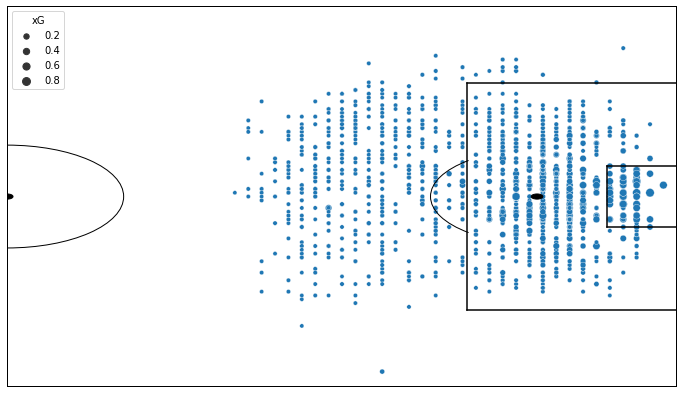

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Cristiano"], size="xG", ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

(0.0, 0.74)

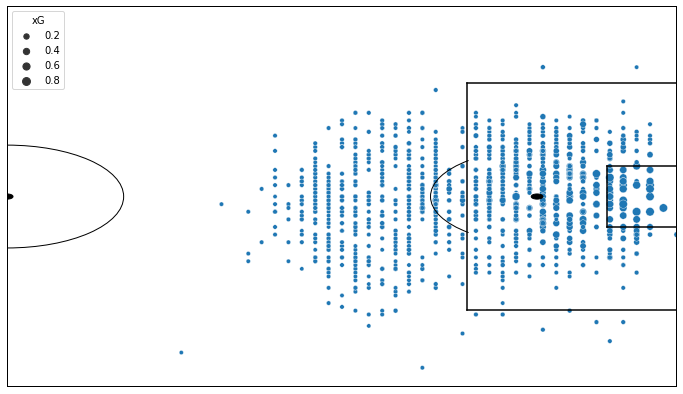

In [ ]:
ax2 = create_full_pitch(x_lims, y_lims)

sns.scatterplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Messi"], size="xG", ax=ax2)

ax2.set_xlim([x_mid, x_lims[1]])
ax2.set_ylim(y_lims)

## Plot HeatMaps

(0.0, 0.74)

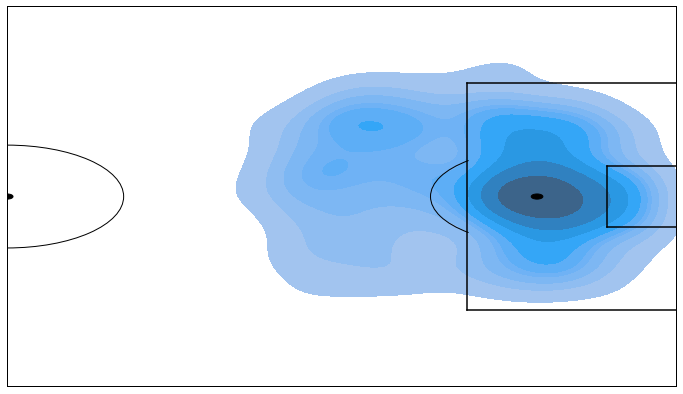

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Cristiano"], shade=True, n_levels=10, ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

(0.0, 0.74)

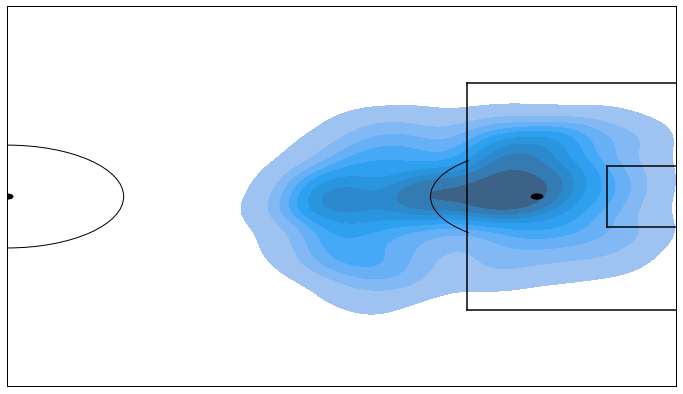

In [ ]:
ax1 = create_full_pitch(x_lims, y_lims)

sns.kdeplot(x="X", y="Y", data=shots_df[shots_df["Player"] == "Messi"], shade=True, n_levels=10, ax=ax1)

ax1.set_xlim([x_mid, x_lims[1]])
ax1.set_ylim(y_lims)

# The Final Comparison

In [ ]:
season_wise_meta_df

,Player,position,games,goals,shots,time,xG,assists,xA,key_passes,season,team,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,Sub,1,0,1,28,0.20,0,0.04,1,2021,Juventus,1,0,0,0.20,0.05,0.02
1,Cristiano,FW,33,29,167,2807,29.84,3,3.85,36,2020,Juventus,3,0,23,23.75,28.64,8.92
2,Cristiano,FWL,33,31,208,2920,29.43,5,6.07,51,2019,Juventus,3,0,19,19.53,26.55,7.22
3,Cristiano,FW,31,21,175,2692,23.32,8,5.19,48,2018,Juventus,3,0,16,18.76,21.85,7.18
4,Cristiano,FW,27,26,178,2304,27.00,5,5.52,40,2017,Real Madrid,1,0,23,24.03,31.62,9.47
5,Cristiano,FWL,29,25,162,2546,25.41,6,4.59,31,2016,Real Madrid,4,0,19,19.47,29.57,8.66
6,Cristiano,AML,36,35,227,3186,35.59,11,8.61,51,2015,Real Madrid,3,0,29,28.90,40.82,9.86
7,Cristiano,FWL,35,48,225,3103,39.31,16,13.60,76,2014,Real Madrid,5,1,38,30.39,43.61,7.52
0,Messi,Sub,1,0,0,23,0.00,0,0.00,0,2021,Paris Saint Germain,0,0,0,0.00,0.00,0.00
1,Messi,FW,35,30,195,3017,26.68,9,11.42,77,2020,Barcelona,4,0,27,22.96,37.91,20.34


In [ ]:
radar_df = season_wise_meta_df.groupby(["Player"])[num_cols].sum().reset_index()

In [ ]:
radar_df

,Player,games,goals,shots,time,xG,assists,xA,key_passes,season,yellow,red,npg,npxG,xGChain,xGBuildup
0,Cristiano,225,215,1343,19586,210.10,54,47.47,334,16140,23,1,167,165.03,222.71,58.85
1,Messi,244,231,1244,20547,192.36,97,105.89,596,16140,27,0,203,163.35,298.75,119.30


In [ ]:
radar_df.columns

Index(['Player', 'games', 'goals', 'shots', 'time', 'xG', 'assists', 'xA',
       'key_passes', 'season', 'yellow', 'red', 'npg', 'npxG', 'xGChain',
       'xGBuildup'],
      dtype='object')

In [ ]:
cols_for_radar = ['goals', 'shots', 'xG', 'assists', 'xA', 'key_passes', 'npg', 'npxG', 'xGChain', 'xGBuildup']

## Radar Plot for Comparison Analysis

In [ ]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(r=radar_df.loc[(radar_df["Player"] == "Cristiano"), cols_for_radar].values.flatten(), 
                              theta=cols_for_radar, fill='toself', name='Cristiano'))
fig.add_trace(go.Scatterpolar(r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].values.flatten(), 
                              theta=cols_for_radar, fill='toself', name="Messi"))
# Additional properties for the plot:
fig.update_layout(title="Cristiano vs Messi", polar=dict(radialaxis=dict(visible=True)), showlegend=True)
fig.show()

## Per90 Stats

In [ ]:
per90Cols = ['goals', 'shots', 'xG', 'assists', 'xA', 'key_passes', 'npg', 'npxG', 'xGChain', 'xGBuildup']

for col in per90Cols:
  radar_df[col + "Per90"] = radar_df[col].divide(radar_df["time"]).multiply(90)

In [ ]:
cols_for_radar = [i + "Per90" for i in per90Cols]

In [ ]:
radar_df[cols_for_radar]

,goalsPer90,shotsPer90,xGPer90,assistsPer90,xAPer90,key_passesPer90,npgPer90,npxGPer90,xGChainPer90,xGBuildupPer90
0,0.987951,6.171245,0.965434,0.248136,0.21813,1.53477,0.767385,0.758332,1.023379,0.270423
1,1.011827,5.448971,0.842576,0.424880,0.46382,2.61060,0.889181,0.715506,1.308585,0.522558


In [ ]:
# Initiate the plotly go figure
fig = go.Figure()
# Add Radar plots for different players:
fig.add_trace(go.Scatterpolar(r=radar_df.loc[(radar_df["Player"] == "Cristiano"), cols_for_radar].sum(),
             theta=cols_for_radar, fill='toself', name='Cristiano'))
fig.add_trace(go.Scatterpolar(r=radar_df.loc[(radar_df["Player"] == "Messi"), cols_for_radar].sum(),
            theta=cols_for_radar, fill='toself', name="Messi"))
# Additional properties for the plot:
fig.update_layout(title="Cristiano vs Messi", polar=dict(radialaxis=dict(visible=True)), showlegend=True)
fig.show()

# Who Won?

Messi's Assist numbers are much better than those of Cristiano. He contributes a lot more to the buildup as well. But that necessarily is not a reflection on Cristiano whose heatmap shows that he spends a lot more time inside the opponents penalty area compared to Messi. Thus, Cristiano also ends up taking more shots. Still, both of them have quite similar numbers in terms of the no. of goals scored.